In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.cluster import KMeans,DBSCAN
import random
from scipy.spatial import distance


### Data representation

In [3]:
data = pd.read_csv("data.csv", skiprows = 5, header = None, sep="\s+")
#data = pd.read_csv("DataSummary.csv")
data.head(3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,19890101,0,5.0,312,54,9.0,313,8.1,306,6.2,287,5.3,252,0.0,0.0,0.0,0,0.99
1,19890101,1,4.7,316,46,6.8,325,7.4,329,4.6,318,2.2,261,0.0,0.0,0.0,0,1.00
2,19890101,2,4.5,315,41,5.0,347,6.8,2,4.0,18,2.2,94,0.0,0.0,0.0,0,1.00


In [515]:
train_data = data[4]

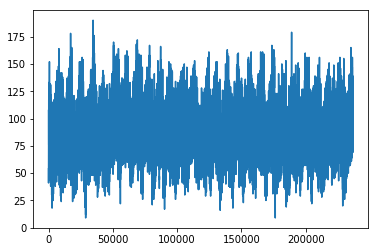

In [516]:
train_data.plot()

In [517]:

level = 5
recunstruct = 2**level
print("Dec level = %d, recunstruct = %d"%(level, recunstruct))
coefsd = pywt.downcoef('d', train_data, 'haar', level=level)    
coefsa = pywt.downcoef('a', train_data, 'haar', level=level)  

Dec level = 5, recunstruct = 32


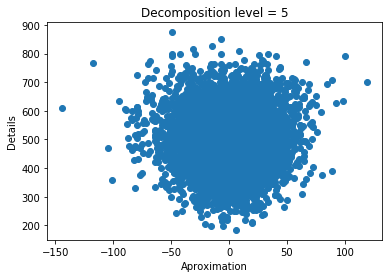

In [518]:
plt.scatter(coefsd, coefsa)
plt.title("Decomposition level = %d"%level)
plt.xlabel('Aproximation')
plt.ylabel('Details');

### Clastering

In [519]:
X = np.asarray(list(zip(coefsd, coefsa)))
print(len(X))

7396


In [520]:
n_clusters = 500
kmeans = KMeans(n_clusters= n_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

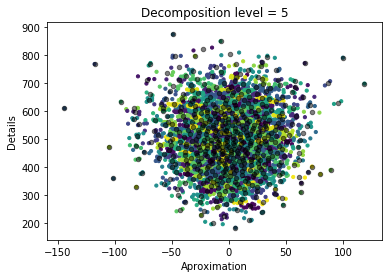

In [521]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5);
plt.title("Decomposition level = %d"%level)
plt.xlabel('Aproximation')
plt.ylabel('Details')
plt.show();

### Result visualization

In [522]:
every_point_classes = [y for y in y_kmeans for i in range(recunstruct) ]
every_point_classes = np.asarray(every_point_classes)


In [523]:
def all_patterns(data, every_point_classes, dclass, recunstruct):
    mask = every_point_classes == dclass
    indx = np.where(mask)[0]    
    count = len(indx)//recunstruct
    patterns = []

    for i in range(count): 
        patterns.append(data[indx[i*recunstruct:(i+1)*recunstruct]])
    return patterns

def plot_pattern(patterns, color = 'b', dclass = 'x', save = False):    
    count = len(patterns)
    if count <= 1:
        return
    fig, axs = plt.subplots(count, 1, constrained_layout=False, figsize = (6,1*count))
    for i in range(count): 
        axs[i].plot(list(patterns[i]), color = color);
    fig.suptitle('Class = %d, Pattern count = %d\n'%(dclass, count), fontsize=14)
    fig.tight_layout()
    if save == True:
        fig.savefig('Class_%d.png'%dclass)   
    plt.show();
    
def pattern_closes(pattern):
    if len(pattern) < 1:
        return 100000  
    p_template = pattern[0]
    closes = 1
    
    for p_template in pattern[:-1]:
        for p in pattern[:-1]:
            closes += distance.euclidean(p_template ,p)
    return closes/len(pattern)

def get_best_claster(data, every_point_classes, recunstruct):
    classes = list(set(every_point_classes))
    best_pattern = None
    min_pc = 1000
    dc = -1
    for dclass in classes:
        pattern = all_patterns(train_data,  every_point_classes, dclass, recunstruct)
        pc = pattern_closes(pattern)
        if pc < min_pc:
            min_pc = pc
            dc = dclass
            best_pattern = pattern
    return min_pc, dc, best_pattern

def sorted_claster(data, every_point_classes, recunstruct):
    classes = list(set(every_point_classes))    
    patterns_closses = []
    for dclass in classes:
        pattern = all_patterns(train_data,  every_point_classes, dclass, recunstruct)
        pc = pattern_closes(pattern)
        patterns_closses.append([pattern,dclass,pc])    
    return sorted(patterns_closses, key = lambda t: t[-1])
        
    

In [524]:
sorted_class = sorted_claster(train_data, every_point_classes, recunstruct)

C:\Users\Zoya\Anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [526]:
stop_point = len(train_data)
every_point_classes_ = every_point_classes[:stop_point]
closes, dclass, best_pattern = get_best_claster(train_data, every_point_classes, recunstruct)

print(closes, dclass)

C:\Users\Zoya\Anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


0.5 25


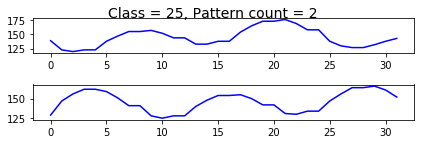

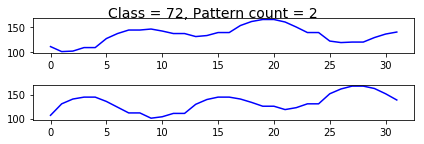

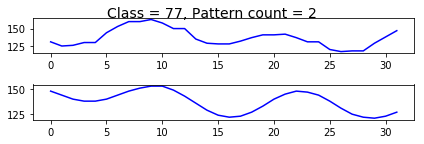

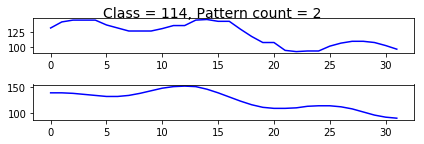

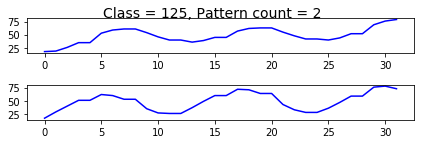

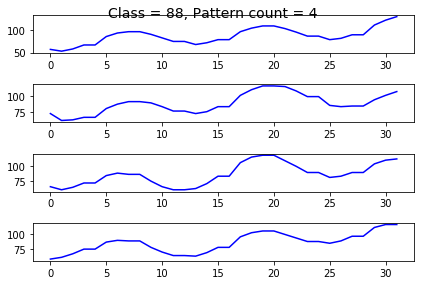

In [527]:
plot_pattern(sorted_class[0][0], color = 'b', dclass = sorted_class[0][1])
plot_pattern(sorted_class[1][0], color = 'b', dclass = sorted_class[1][1])
plot_pattern(sorted_class[2][0], color = 'b', dclass = sorted_class[2][1])
plot_pattern(sorted_class[3][0], color = 'b', dclass = sorted_class[3][1])
plot_pattern(sorted_class[4][0], color = 'b', dclass = sorted_class[4][1])
plot_pattern(sorted_class[50][0], color = 'b', dclass = sorted_class[50][1])
